In [75]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [65]:
df_train = pd.read_csv("C:\\AmaruAyelen\\proyectos\\PythonDataScienceMachineLearning\\PythonDataScienceMachineLearning\\bootcampIA\\RNN\\train.csv")
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
df_train.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

In [66]:
df_test = pd.read_csv("C:\\AmaruAyelen\\proyectos\\PythonDataScienceMachineLearning\\PythonDataScienceMachineLearning\\bootcampIA\\RNN\\test.csv")
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [92]:

# Separar las características (X) de la etiqueta (y)
X_train = df_train.drop('Activity', axis=1)
y_train = df_train['Activity']
X_test = df_test.drop('Activity', axis=1)
y_test = df_test['Activity']

# Normalizar las características usando StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir y_train y y_test de texto a valores numéricos
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Definir time_steps y features
time_steps = 10  # Puedes ajustar esto
num_features = X_train.shape[1]  # Número total de características (562)

# Antes de hacer el reshape, asegúrate de que el tamaño sea divisible por time_steps
if X_train.shape[0] % time_steps != 0:
    X_train = X_train[:-(X_train.shape[0] % time_steps)]
    y_train = y_train[:-(y_train.shape[0] % time_steps)]  # Ajusta también y_train
if X_test.shape[0] % time_steps != 0:
    X_test = X_test[:-(X_test.shape[0] % time_steps)]

# Remodelar los datos
X_train = X_train.reshape((X_train.shape[0] // time_steps, time_steps, num_features))
y_train = y_train[:X_train.shape[0] * time_steps]
y_train = y_train.reshape((-1, time_steps))[:, -1]  # Tomar la última etiqueta de cada ventana

X_test = X_test.reshape((X_test.shape[0] // time_steps, time_steps, num_features))
y_test = y_test[:X_test.shape[0] * time_steps]
y_test = y_test.reshape((-1, time_steps))[:, -1]  # Tomar la última etiqueta de cada ventana

# Función para construir el modelo
def build_model(units=50, activation='tanh', optimizer='adam'):
    model = Sequential()
    model.add(SimpleRNN(units=units, activation=activation, input_shape=(time_steps, num_features)))
    model.add(Dropout(0.2))  # Añadir Dropout
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Crear el modelo
model = build_model(units=50, activation='tanh', optimizer='adam')

# Implementación Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Ajustar el modelo y almacenar el historial para la gráfica
history = model.fit(X_train, y_train, epochs=20, batch_size=128, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])



Epoch 1/20


c:\Users\AMARU\anaconda3\envs\Python_DS_ML\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.2514 - loss: 1.9698 - val_accuracy: 0.6088 - val_loss: 0.8893
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5555 - loss: 0.9432 - val_accuracy: 0.7211 - val_loss: 0.6930
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7049 - loss: 0.7087 - val_accuracy: 0.8095 - val_loss: 0.5566
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7774 - loss: 0.5503 - val_accuracy: 0.8367 - val_loss: 0.4841
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8482 - loss: 0.4300 - val_accuracy: 0.8367 - val_loss: 0.4423
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8591 - loss: 0.3679 - val_accuracy: 0.8435 - val_loss: 0.4054
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9140 - loss: 0.2971 - val_accuracy: 0.8707 - val_loss: 0.3734
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9116 - loss: 0.2706 - val_accuracy: 0.8844 - val_loss: 0.3444
Epoch 9/20


In [94]:
#time_steps = 10  # Puedes ajustar esto
num_features

562

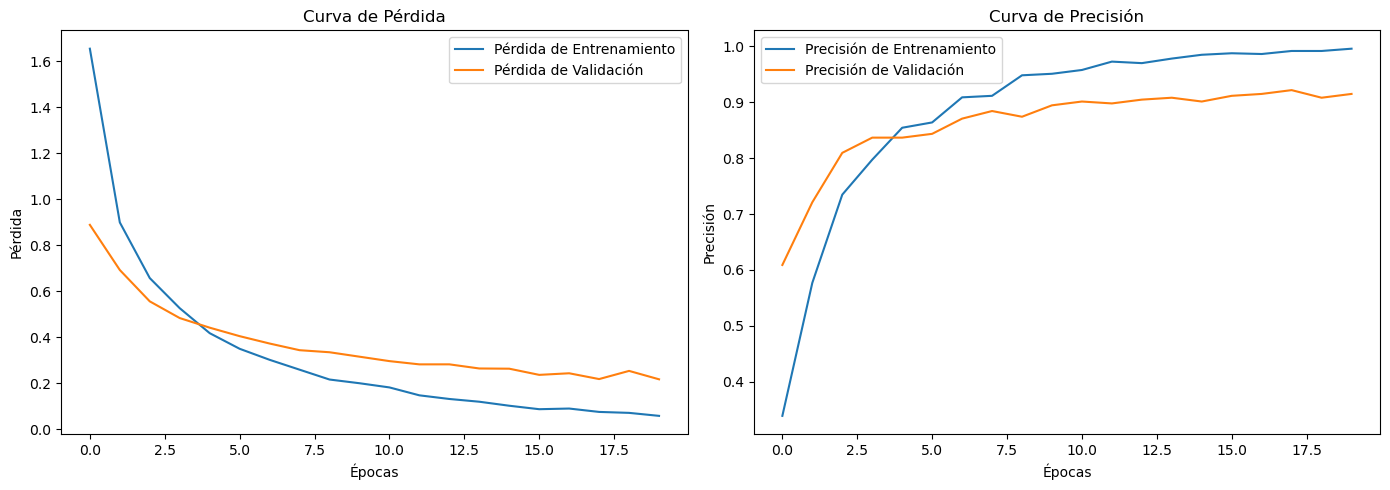

In [93]:
# Graficar la pérdida
plt.figure(figsize=(14, 5))

# Pérdida en el entrenamiento
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión en el entrenamiento
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Curva de Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

# ESTOS SON LOS RESULTADOS DE LAS MÉTRICAS ANTES DE APLICAR BÚSQUEDA DE HIPERPARÁMETROS Y BÚSQUEDA POR GRILLA

In [81]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.4929 - loss: 1.2440 - val_accuracy: 0.6990 - val_loss: 0.7627
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.7365 - loss: 0.6886 - val_accuracy: 0.7041 - val_loss: 0.7021
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.7669 - loss: 0.6013 - val_accuracy: 0.7431 - val_loss: 0.6325
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.7944 - loss: 0.5282 - val_accuracy: 0.7469 - val_loss: 0.6132
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.7791 - loss: 0.5429 - val_accuracy: 0.6865 - val_loss: 0.6980
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.7668 - loss: 0.5374 - val_accuracy: 0.7329 - val_loss: 0.6165
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.7946 - loss: 0.4946 - val_accuracy: 0.7509 - val_loss: 0.6112
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.7948 - loss: 0.4845 

In [82]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss en el conjunto de prueba: {loss}")
print(f"Accuracy en el conjunto de prueba: {accuracy}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7247 - loss: 0.6175
Loss en el conjunto de prueba: 0.6075649261474609
Accuracy en el conjunto de prueba: 0.7465218901634216


In [83]:
# Hacer predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [84]:
# Mostrar un reporte de clasificación
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       537
           1       0.83      0.81      0.82       491
           2       0.82      0.83      0.82       532
           3       0.56      0.59      0.57       496
           4       0.51      0.50      0.50       420
           5       0.71      0.75      0.73       471

    accuracy                           0.75      2947
   macro avg       0.74      0.74      0.74      2947
weighted avg       0.75      0.75      0.75      2947

